In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
arch=resnext50

# Checking solution where training set = test set(Just checking!!!)

In [11]:
PATH = "final_data1/user35/"
sz=1080
print(sz)
sz_y=1920
print(sz_y)

1080
1920


In [12]:
tfms = tfms_from_model(arch, sz=sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name="train", val_name="train", bs =10)
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      1.032317   126.503893 0.476923  



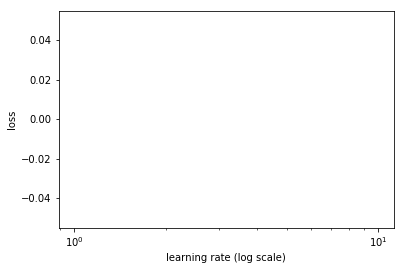

In [13]:
lrf=learn.lr_find()
learn.sched.plot()

In [14]:
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.764538   0.877539   0.676923  
    1      0.548223   0.304009   0.830769        
    2      0.461523   0.113826   0.938462        
    3      0.4395     0.061996   1.0             
    4      0.387898   0.056183   1.0             



[array([0.05618]), 1.0]

In [15]:
learn.fit(0.001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.23651    0.05545    1.0       
    1      0.213321   0.045939   1.0             
    2      0.20118    0.035928   1.0             
    3      0.215622   0.030304   1.0             
    4      0.194779   0.030896   1.0             



[array([0.0309]), 1.0]

In [16]:
log_preds,y = learn.TTA(n_aug=1)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

1.0

[[21  0]
 [ 0 44]]


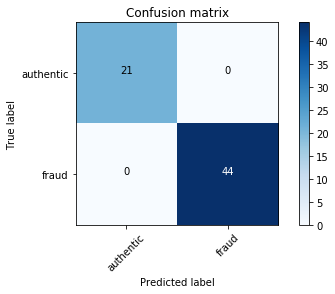

In [17]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

# Real Deal!

In [29]:
PATH = "final_data1/user35/"
sz=1080
print(sz)
sz_y=1920
print(sz_y)

1080
1920


In [30]:
tfms = tfms_from_model(arch, sz=299, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name="train", val_name="test", bs =10)
learn = ConvLearner.pretrained(arch, data, precompute=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      1.120372   287.402812 0.604651  



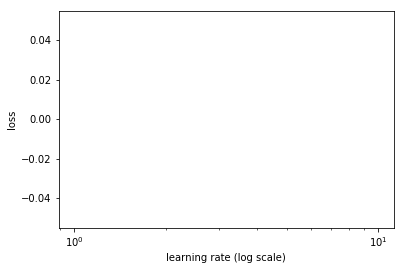

In [31]:
lrf=learn.lr_find()
learn.sched.plot()

In [32]:
learn.fit(0.1, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      1.502617   4.822219   0.418605  
    1      1.573773   6.84163    0.697674       
    2      2.084082   4.689795   0.767442       
    3      2.431833   7.623986   0.627907       
    4      2.806514   9.499813   0.627907       



[array([9.49981]), 0.6279069850611132]

In [38]:
learn.fit(0.1, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy       
    0      3.850201   7.998538   0.767442  



[array([7.99854]), 0.7674418604651163]

In [16]:
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy       
    0      5.828454   25.424094  0.651163  
    1      4.336335   22.670747  0.651163       
    2      2.738007   23.214506  0.651163       
    3      2.899875   22.805388  0.651163       
    4      2.523729   20.231621  0.697674       



[array([20.23162]), 0.6976744158323421]

In [18]:
learn.fit(0.001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy           
    0      6.663549   20.552082  0.697674  
    1      3.701764   20.100842  0.674419       
    2      2.967116   20.092722  0.697674       
    3      2.492496   19.349411  0.697674       
    4      1.966238   19.704577  0.72093        



[array([19.70458]), 0.7209302353304486]

In [19]:
learn.fit(0.0001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.421793   19.419528  0.697674  
    1      1.645259   19.624468  0.72093         
    2      1.345565   19.0138    0.697674       
    3      1.365727   19.701236  0.697674       
    4      1.014813   19.703879  0.72093        



[array([19.70388]), 0.7209302353304486]

In [20]:
learn.fit(0.01, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy       
    0      4.283473   19.872009  0.697674  
    1      3.56155    20.818     0.697674       
    2      2.475618   19.271503  0.72093        
    3      1.91687    19.280077  0.72093        
    4      1.418992   18.490066  0.674419       
    5      1.573022   17.707791  0.72093        
    6      1.251353   18.881532  0.697674       
    7      1.049818   18.589672  0.674419       
    8      1.578141   18.682605  0.72093        
    9      1.303174   19.300781  0.697674       
    10     1.109326   19.779173  0.674419       
    11     1.096053   18.839968  0.674419        
    12     0.952507   18.282788  0.697674        



[array([18.28279]), 0.6976744296938874]

In [21]:
learn.fit(0.001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.108529   18.666535  0.651163  
    1      0.336251   19.04326   0.674419         
    2      0.769454   18.278245  0.674419        
    3      0.930817   17.737605  0.72093         
    4      0.917784   18.061973  0.72093         
    5      0.909356   18.593668  0.674419        
    6      0.875057   19.212511  0.674419        
    7      0.86129    18.933068  0.674419        
    8      0.726771   18.998828  0.744186        
    9      0.811829   19.281909  0.674419        
    10     0.748519   18.719847  0.72093         
    11     0.82277    18.482753  0.744186        
    12     0.911747   18.424474  0.697674        



[array([18.42447]), 0.6976744296938874]

In [22]:
learn.fit(0.0001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      1.011105   18.304456  0.72093   
    1      0.928326   18.382566  0.697674        
    2      1.153624   18.624588  0.674419        
    3      0.843331   18.414639  0.697674        
    4      0.624562   18.526205  0.697674        
    5      0.71215    18.786405  0.674419        
    6      1.750411   18.396909  0.72093         
    7      1.614879   17.826734  0.744186       
    8      2.669487   18.368403  0.744186       
    9      2.262101   18.573834  0.674419       
    10     1.909881   18.85908   0.674419       
    11     1.695014   18.463974  0.697674       
    12     1.630026   19.781469  0.674419       



[array([19.78147]), 0.6744186101957809]

In [23]:
# learn.unfreeze()
# lr = 0.001
# lrs=np.array([lr/100,lr/10,lr])
# learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

In [39]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.7674418604651163

[[ 7  7]
 [ 3 26]]


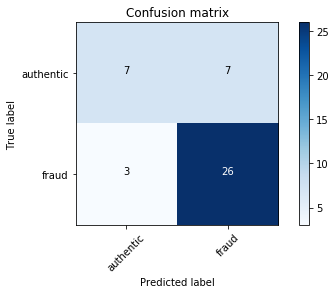

In [40]:
preds = np.argmax(probs, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [41]:
def accuracy_new(preds, targs, thres=0.5):
    preds = [int(x[1] > thres) for x in preds]
    return (preds==targs).mean()

In [42]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
highest = 0
h_acc = 0
for cut in [0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]:
    acc = accuracy_new(probs, y, cut)
    if acc > h_acc:
        h_acc = acc
        highest = cut
    print(h_acc)

0.7674418604651163                   
0.7674418604651163
0.7674418604651163
0.7674418604651163
0.7674418604651163
0.7674418604651163
0.7674418604651163
0.7674418604651163


[[ 7  7]
 [ 3 26]]


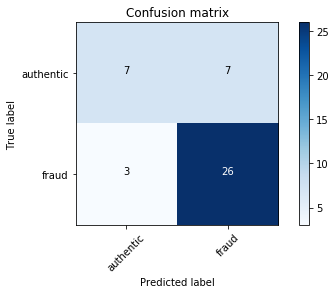

In [43]:
preds = [int(x[1] > highest) for x in probs]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)